# CO<sub>2</sub> Emissions per Vehicle: Simple Linear Regression
## Summary
This is the first part of the 'CO<sub>2</sub> Emissions per Vehicle' analysis in which we will be attempting to find a model that best fits our <a href="https://github.com/tabburn/CO2-emissions-by-vehicle/blob/main/resources/2023fuelconsumptionCO2.csv">data</a> (provided by the Canadian government) in order to predict emissions of future vehicles. In this section we'll be taking a look at how a simple linear regression performs against our data. We will explore linear relationships and compare the linear regression models of different attributes.
## Importing Libraries and Data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
LR = linear_model.LinearRegression()

from sklearn.metrics import r2_score

In [49]:
df = pd.read_csv(r'C:\Users\tiffa\Documents\GitHub\CO2-emissions-by-vehicle\resources\2023fuelconsumptionCO2.csv')

In [50]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS', 'CO2_rating'],
      dtype='object')

In [51]:
# changing column names from uppercase to lowercase for convenience
df.columns = df.columns.str.lower()

In [52]:
df.head()

,modelyear,make,model,vehicleclass,enginesize,cylinders,transmission,fueltype,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions,co2_rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4


In [53]:
# extracting specific columns and assigning to a new dataframe
cdf = df[['enginesize', 'cylinders', 'fuelconsumption_comb', 'co2emissions']]
cdf.head()

,enginesize,cylinders,fuelconsumption_comb,co2emissions
0,1.5,4,7.2,167
1,1.5,4,7.4,172
2,1.5,4,7.8,181
3,3.5,6,11.2,263
4,3.0,6,12.4,291


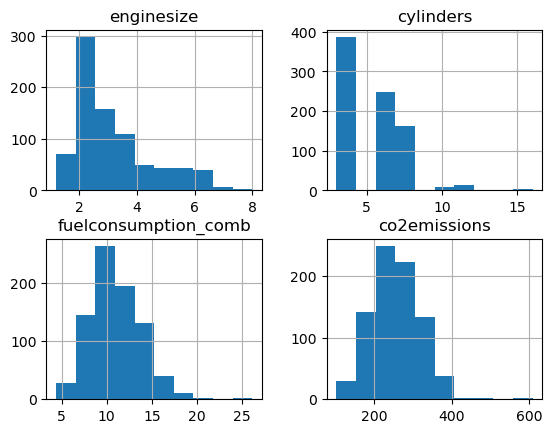

In [54]:
# looking at distributions
cdf.hist()
plt.show()

## Exploring Linear Relationships

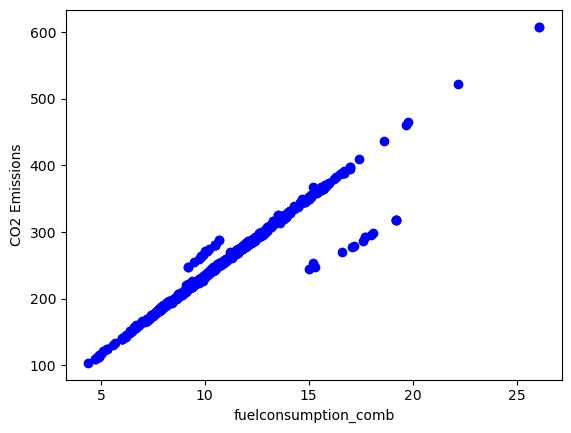

In [55]:
# looking for a linear relationship between 'fuelconsumption_comb' and 'co2emissions'
plt.scatter(cdf.fuelconsumption_comb, cdf.co2emissions, color='blue')
plt.xlabel('fuelconsumption_comb')
plt.ylabel('CO2 Emissions')
plt.show()

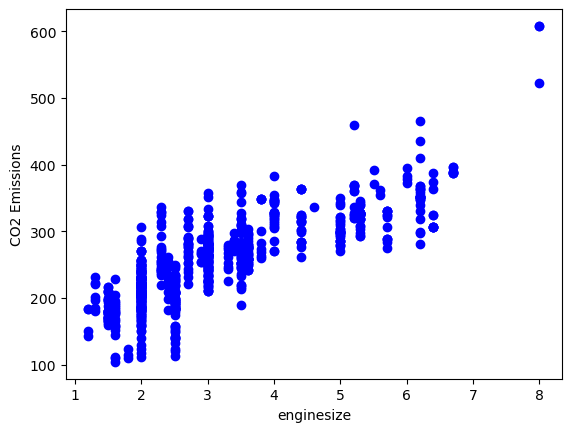

In [56]:
# looking for a linear relationship between 'enginesize' and 'co2emissions'
plt.scatter(cdf.enginesize, cdf.co2emissions, color='blue')
plt.xlabel('enginesize')
plt.ylabel('CO2 Emissions')
plt.show()

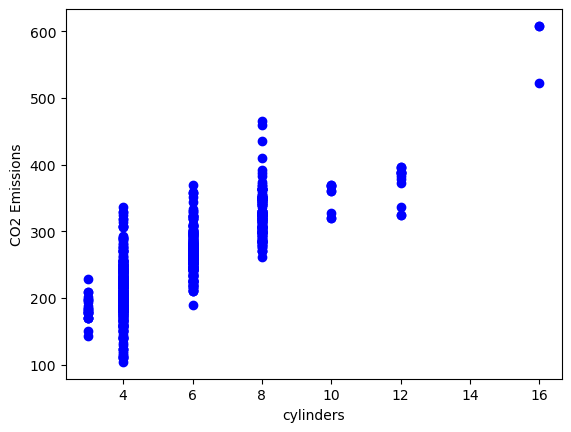

In [57]:
# looking for a linear relationship between 'cylinders' and 'co2emissions'
plt.scatter(cdf.cylinders, cdf.co2emissions, color='blue')
plt.xlabel('cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

As we can see, there is **undoubtedly** a linear relationship for 'fuelconsumption_comb' and 'co2emissions', but not so much for the others. Let's compare our results using a simple linear regression model first for 'enginesize' and then for 'fuelconsumption_comb'.
## Engine Size
### Splitting and Training
First we'll split the dataset into training and testing sets for our model. We'll split the dataset randomly using np.random.rand() with 80% of the dataset being using for training and 20% for testing. To do this we'll create a mask that accounts for a random 80% chunk of our dataframe and assign it to a 'train' set then use the rest for our 'test' set (20%).

In [58]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

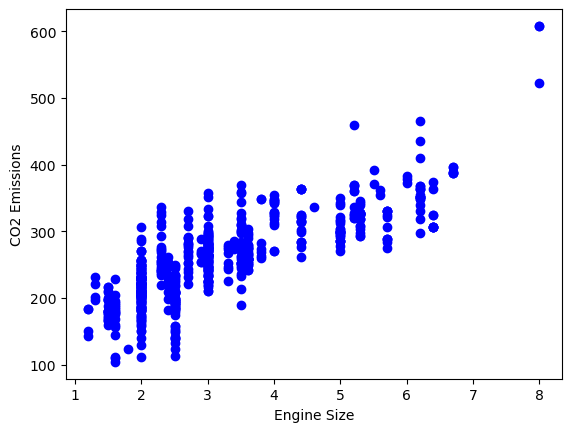

In [59]:
# plotting with our training dataset
plt.scatter(train.enginesize, train.co2emissions, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

### Modeling
Next we'll model the data using the 'sci-kit learn' library which I've imported in the first section.

In [60]:
# training the model for the 'enginesize' attribute
train_X = np.asanyarray(train[['enginesize']])
train_y = np.asanyarray(train[['co2emissions']])
LR.fit(train_X, train_y)

# printing the coefficients
print(f'Coefficient: {LR.coef_}')
print(f'Intercept: {LR.intercept_}')

Coefficient: [[37.27228871]]
Intercept: [139.58693991]


Now we'll plot the fit line over the data.

In [61]:
LR.coef_

array([[37.27228871]])

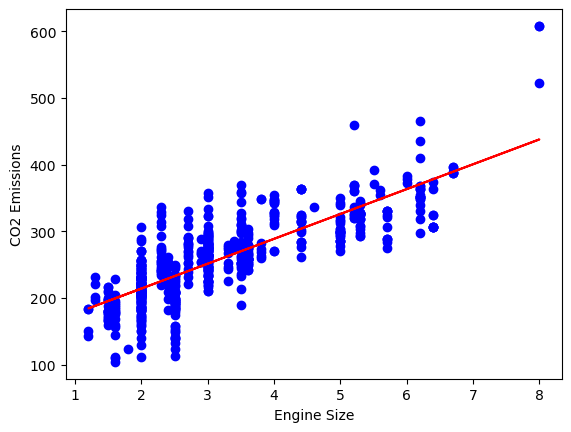

In [62]:
# plotting the fit line over the data
plt.scatter(train.enginesize, train.co2emissions, color='blue')
plt.plot(train_X, LR.coef_[0][0]*train_X + LR.intercept_, '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

Next we'll check our metrics to see how well the model fits the data.
### Model Metrics

In [63]:
# running metrics
test_X = np.asanyarray(test[['enginesize']])
test_y = np.asanyarray(test[['co2emissions']])
test_y1 = LR.predict(test_X)

print(f'The mean absolute error (MAE) is: {np.mean(np.absolute(test_y1 - test_y))}')
print(f'The residual sum of squares (MSE) is: {np.mean((test_y1 - test_y)**2)}')
print(f'The r2-score is: {r2_score(test_y, test_y1)}')

The mean absolute error (MAE) is: 30.277419360594806
The residual sum of squares (MSE) is: 1506.6562331020953
The r2-score is: 0.6179997917239459


As we can see from the r<sup>2</sup>-score, our linear regression model isn't a great fit when predicting CO<sub>2</sub> emissions based on engine size. Now we'll take a look at 'fuelconsumption_comb' and 'co2emissions'.
## Fuel Consumption
### Splitting and Training

In [64]:
# taking 'fuelconsumption_comb' from the train dataframe and from the test dataframe (80:20 split)
train_x = train[['fuelconsumption_comb']]
test_x = test[['fuelconsumption_comb']]

### Modeling

In [65]:
# fitting the model
LR.fit(train_x, train_y)

# printing the coefficients
print(f'Coefficient: {LR.coef_}')
print(f'Intercept: {LR.intercept_}')

Coefficient: [[21.53988612]]
Intercept: [19.50149864]


In [66]:
# finding the predictions
predictions = LR.predict(test_x)

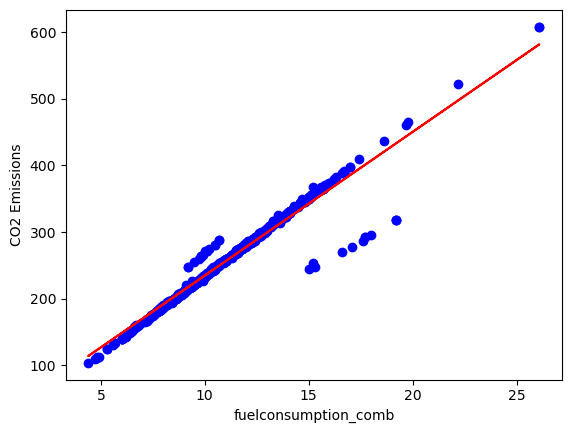

In [67]:
# plotting the fit line over the data
plt.scatter(train.fuelconsumption_comb, train.co2emissions, color='blue')
plt.plot(train_x, LR.coef_[0][0]*train_x + LR.intercept_, '-r')
plt.xlabel('fuelconsumption_comb')
plt.ylabel('CO2 Emissions')
plt.show()

### Model Metrics

In [69]:
# checking the metrics
print(f'The mean absolute error (MAE) is: {np.mean(np.absolute(predictions - test_y))}')
print(f'The residual sum of squares (MSE) is: {np.mean((predictions - test_y)**2)}')
print(f'The r2-score is: {r2_score(test_y, predictions)}')

The mean absolute error (MAE) is: 7.237968513263408
The residual sum of squares (MSE) is: 283.2239701555559
The r2-score is: 0.9281909083099635


## Comparing the Models
Aside from visually comparing the two plots, when we compare the r<sup>2</sup>-score of the first model ('enginesize', r<sup>2</sup> = .62) to the r<sup>2</sup>-score of the second model ('fuelconsumption_comb', r<sup>2</sup> = .93), it's obvious that the variance between 'fuelconsumption_comb' and 'co2emissions' is explained very well suggesting a strong linear relationship. The mean absolute error (MAE) of the the first model is also much higher than the second model. This, along with the low r<sup>2</sup>-score, suggests that a simple linear regression model might not be the best fit when trying to predict CO<sub>2</sub> emissions based on engine size. The variance in the first model might be better explained using a polynomial fit which will be explored in a following section of this data analysis.

*Data analysis continued in <a href="https://github.com/tabburn/CO2-emissions-by-vehicle/blob/main/multiple-linear-regression.ipynb">'CO<sub>2</sub> Emissions per Vehicle: Multiple Linear Regression'</a>.*